# UJIAN AKHIR SEMESTER - BIG DATA & DATA MINING

# PERBANDINGAN METODE KLASIFIKASI LDA, SVM, DAN GRADIENT BOOSTING DALAM DETEKSI PENYAKIT JANTUNG

Nama : Luthfia Ridho Damayanti

NIM : 21.11.4185

Kelas : BDDM-IF03

## IMPORT LIBRARY

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2

## INPUT DATA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Memuat dataset dari file CSV yang terletak di Google Drive
dataset_path = "/content/drive/MyDrive/DATA MINING/uas/heart.csv"
dataset = pd.read_csv(dataset_path)

In [4]:
# Menampilkan 5 baris pertama
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
# menampilkan 10 data terbawah
dataset.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Menampilkan informasi tentang DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## PREPROCESSING DATA

### 1. Cek Missing **Value**

In [7]:
# Memeriksa missing values
print("\nJumlah missing values per kolom:")
print(dataset.isnull().sum())


Jumlah missing values per kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### 2. Pemisahan Fitur dan Target

In [8]:
# Memisahkan fitur (X) dan target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

# Menampilkan informasi awal fitur dan target
print("Fitur (X):")
print(X.head())
print("\nTarget (y):")
print(y.value_counts())

Fitur (X):
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  

Target (y):
target
1    165
0    138
Name: count, dtype: int64


### 3. Penanganan Variabel Kategorial

In [9]:
# Daftar kolom kategorikal
categorical_columns = ['sex', 'cp', 'restecg', 'slope', 'ca', 'thal']

# Mengubah tipe data kolom kategorikal menjadi kategori
X[categorical_columns] = X[categorical_columns].astype('category')

# Memverifikasi tipe data setelah konversi
print("\nTipe Data Setelah Konversi Kategorikal:")
print(X[categorical_columns].dtypes)


Tipe Data Setelah Konversi Kategorikal:
sex        category
cp         category
restecg    category
slope      category
ca         category
thal       category
dtype: object


### 4. Pemisahan Data Latih dan Data Uji

In [10]:
# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan ukuran dataset latih dan uji
print("\nUkuran Data Latih dan Uji:")
print(f"Data latih: {X_train.shape[0]} baris, {X_train.shape[1]} kolom")
print(f"Data uji: {X_test.shape[0]} baris, {X_test.shape[1]} kolom")


Ukuran Data Latih dan Uji:
Data latih: 242 baris, 13 kolom
Data uji: 61 baris, 13 kolom


## EDA

### Visualisasi Distribusi Target

<ipython-input-11-53d47af9a98f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


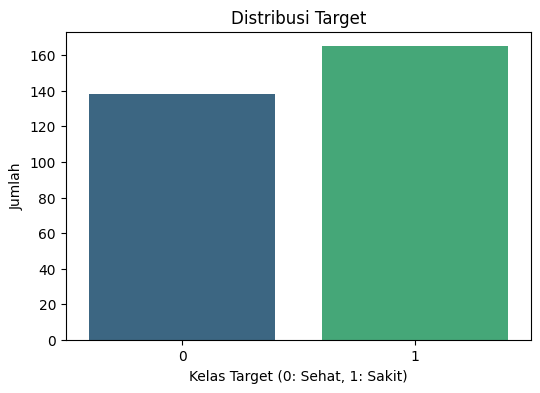

In [11]:
# Visualisasi distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="viridis")
plt.title("Distribusi Target")
plt.xlabel("Kelas Target (0: Sehat, 1: Sakit)")
plt.ylabel("Jumlah")
plt.show()

### Visualisasi Korelasi Antar Fitur

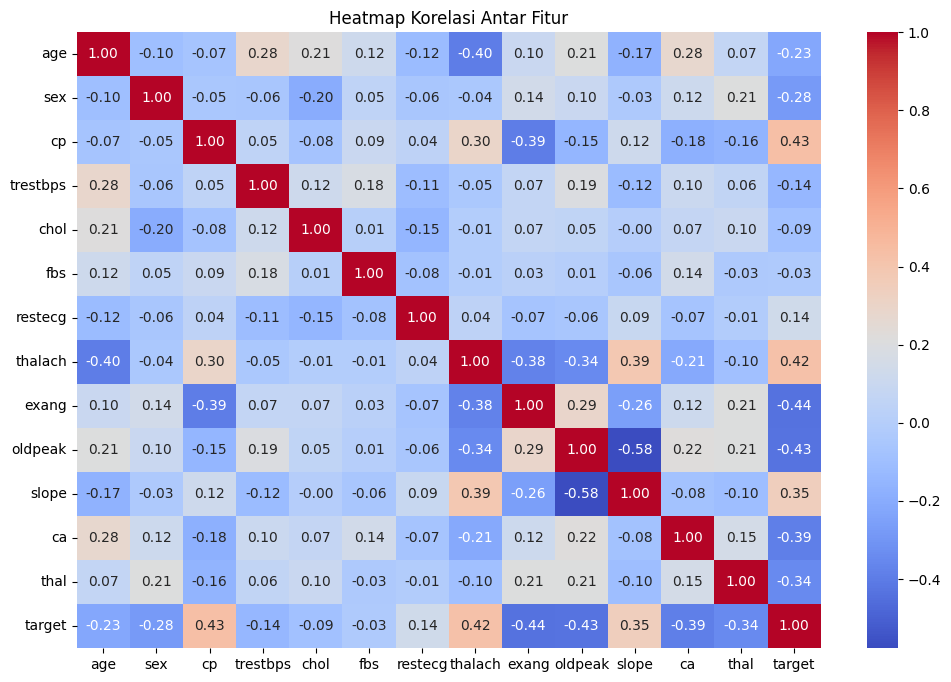

In [12]:
# Korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

### Distribusi Fitur Numerik

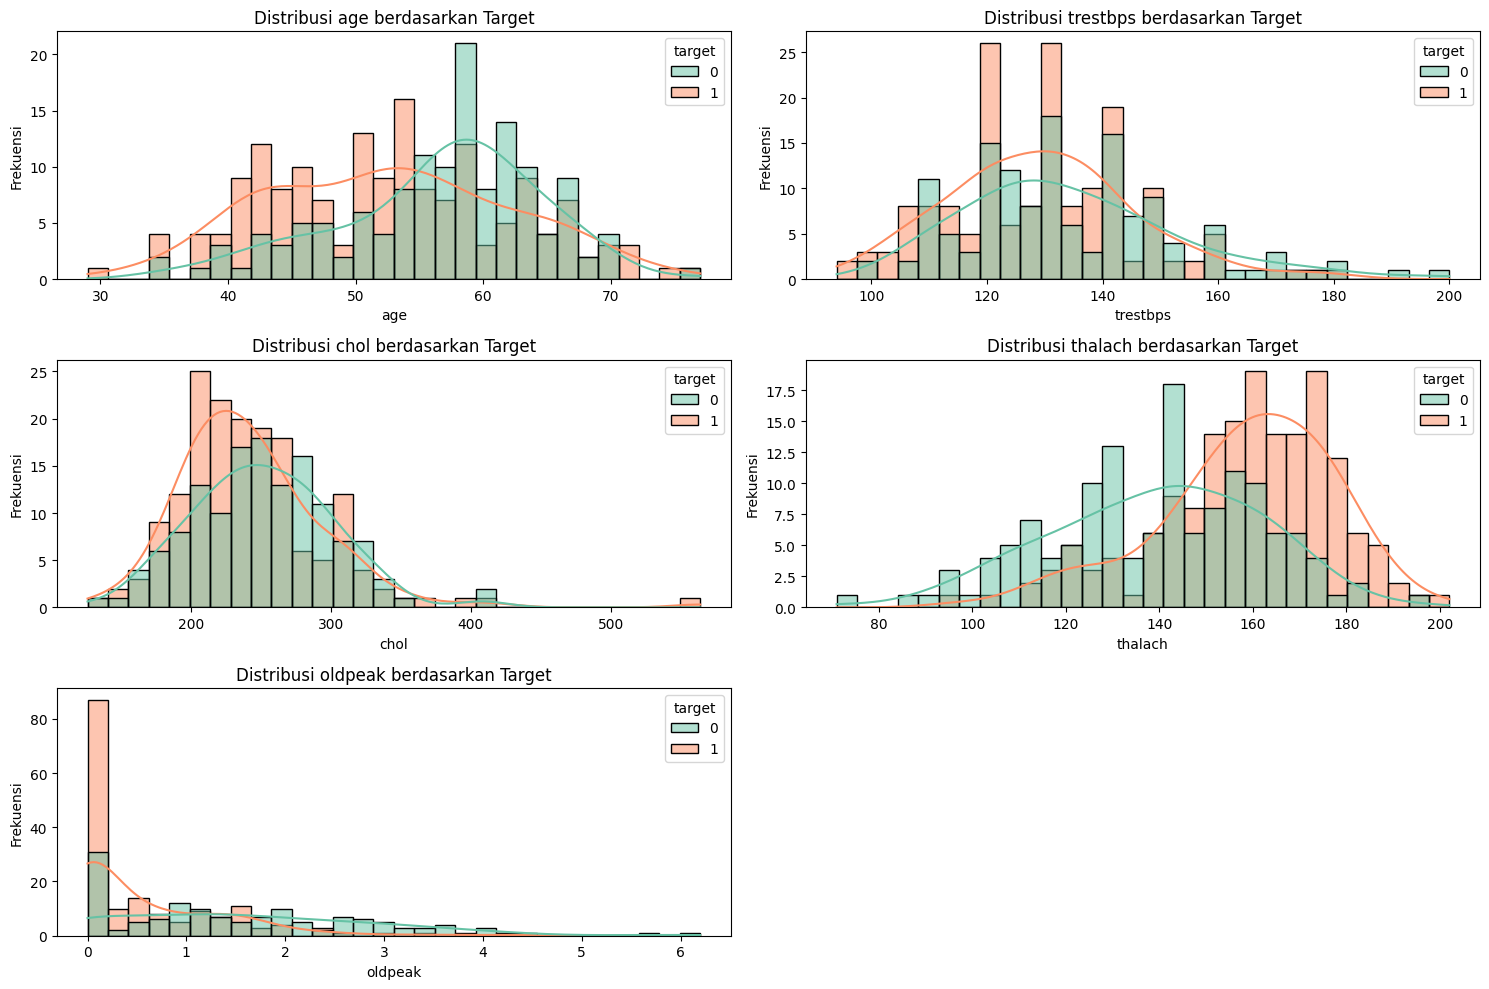

In [13]:
# Visualisasi distribusi fitur numerik berdasarkan kelas target
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=dataset, x=col, hue='target', kde=True, palette="Set2", bins=30)
    plt.title(f"Distribusi {col} berdasarkan Target")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

### Distribusi Fitur Kategorikal

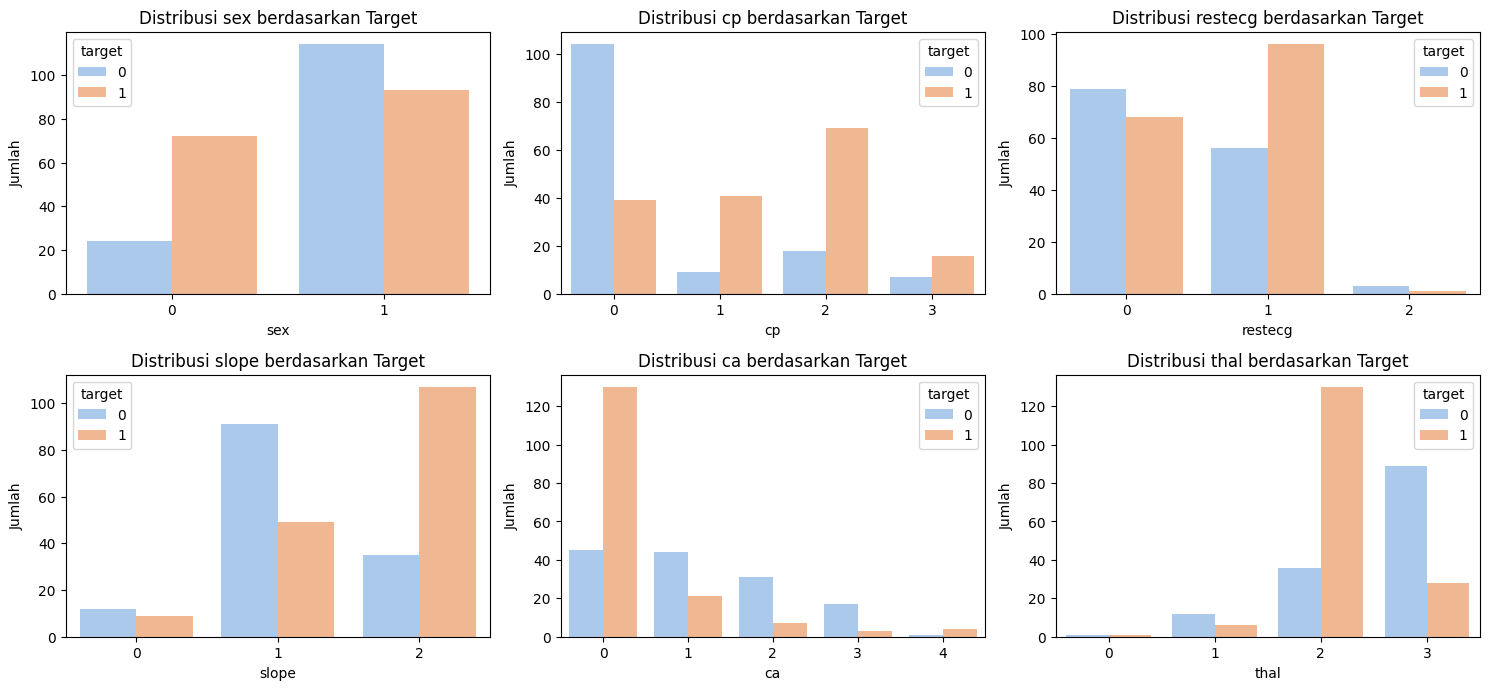

In [14]:
# Visualisasi distribusi fitur kategorikal berdasarkan kelas target
categorical_columns = ['sex', 'cp', 'restecg', 'slope', 'ca', 'thal']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=dataset, x=col, hue='target', palette="pastel")
    plt.title(f"Distribusi {col} berdasarkan Target")
    plt.xlabel(col)
    plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

### Outlier Detection

<ipython-input-15-45da28a4645b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='target', y=col, palette="coolwarm")
<ipython-input-15-45da28a4645b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='target', y=col, palette="coolwarm")
<ipython-input-15-45da28a4645b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='target', y=col, palette="coolwarm")
<ipython-input-15-45da28a4645b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

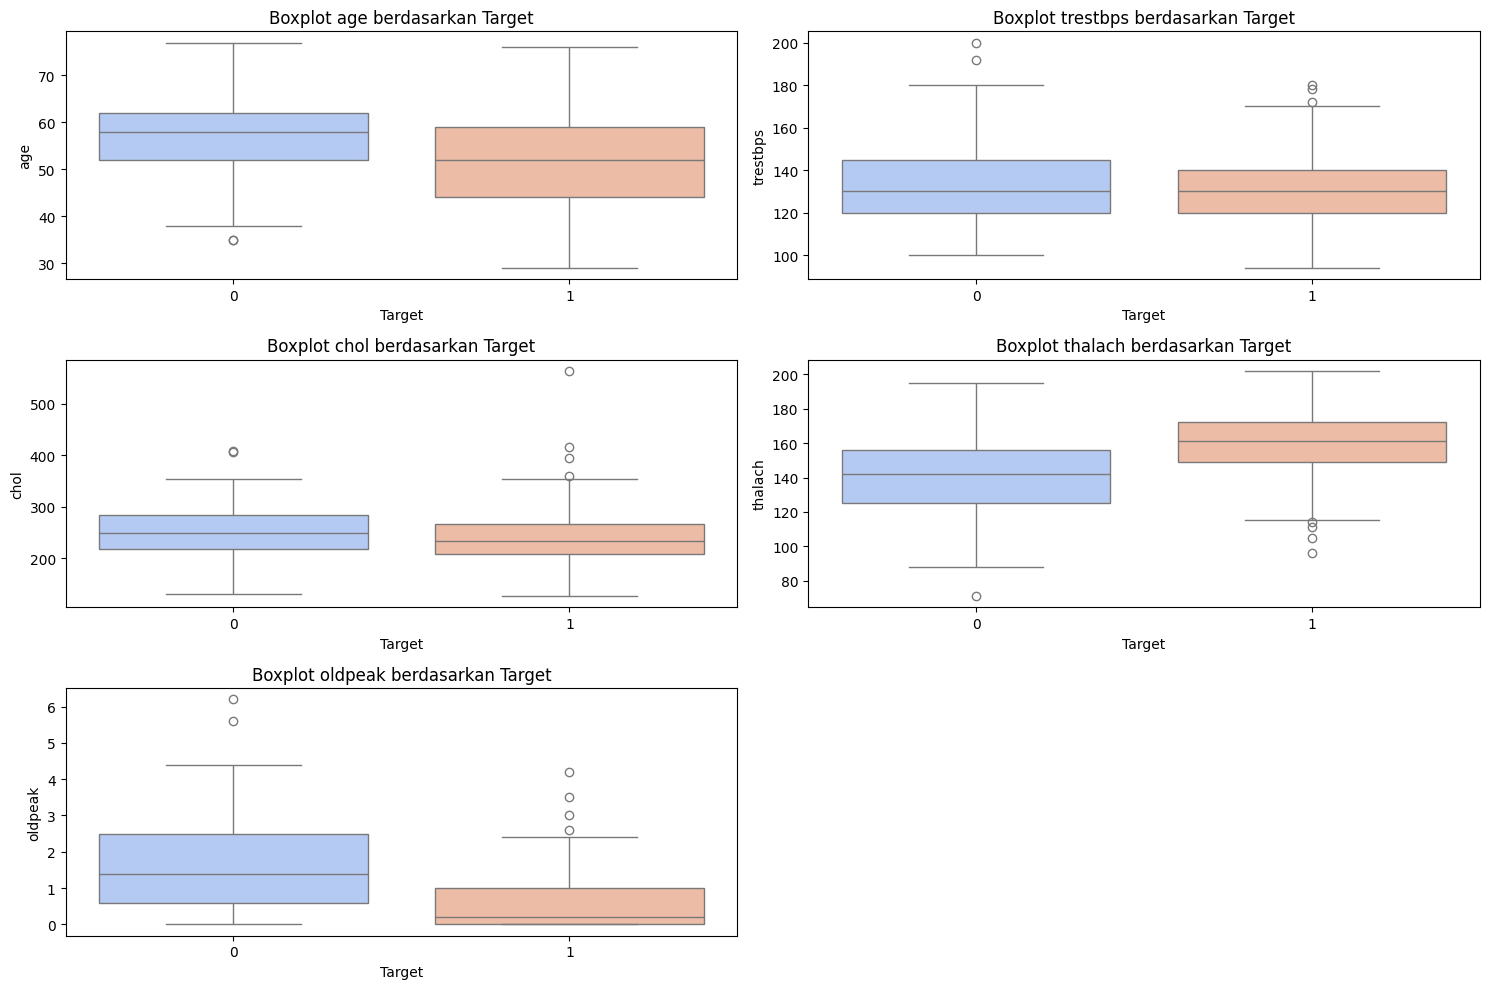

In [15]:
# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=dataset, x='target', y=col, palette="coolwarm")
    plt.title(f"Boxplot {col} berdasarkan Target")
    plt.xlabel("Target")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Hubungan antar Fitur

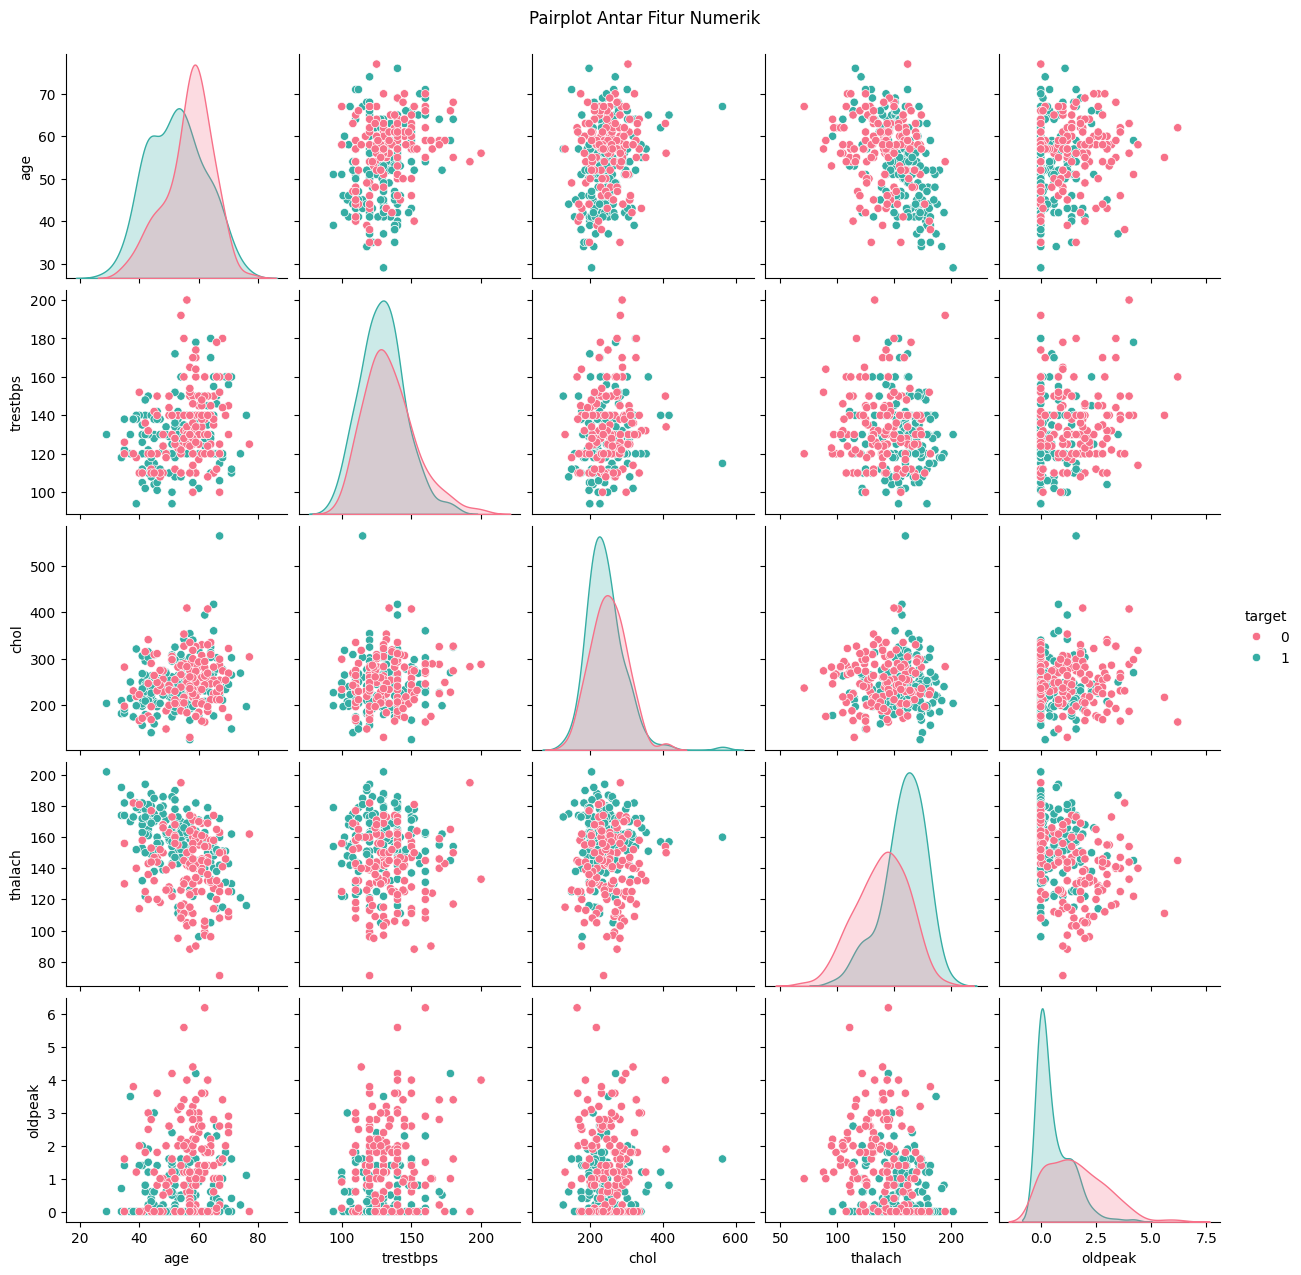

In [16]:
# Pairplot antar fitur numerik
sns.pairplot(dataset, vars=numeric_columns, hue="target", palette="husl", diag_kind="kde")
plt.suptitle("Pairplot Antar Fitur Numerik", y=1.02)
plt.show()

## SELEKSI FITUR

### Seleksi Fitur menggunakan Chi-Square

In [17]:
from sklearn.feature_selection import SelectKBest, chi2

# Seleksi Fitur menggunakan Chi-square
selector_chi2 = SelectKBest(score_func=chi2, k=10)  # Memilih 10 fitur terbaik
X_selected_chi2 = selector_chi2.fit_transform(X, y)

# Menampilkan fitur yang dipilih oleh Chi-square
selected_features_chi2 = selector_chi2.get_support(indices=True)
print("Fitur yang dipilih (Chi-square):")
print(X.columns[selected_features_chi2])

Fitur yang dipilih (Chi-square):
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


### Seleksi Fitur menggunakan Mutual Information

In [18]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Seleksi Fitur menggunakan Mutual Information
selector_mutual = SelectKBest(score_func=mutual_info_classif, k=10)  # Memilih 10 fitur terbaik
X_selected_mutual = selector_mutual.fit_transform(X, y)

# Menampilkan fitur yang dipilih oleh Mutual Information
selected_features_mutual = selector_mutual.get_support(indices=True)
print("\nFitur yang dipilih (Mutual Information):")
print(X.columns[selected_features_mutual])


Fitur yang dipilih (Mutual Information):
Index(['sex', 'cp', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')


### Evaluasi Korelasi terhadap Target

In [19]:
# Hitung korelasi fitur numerik terhadap target
correlation = dataset.corr()["target"].sort_values(ascending=False)
print("\nKorelasi fitur terhadap target:")
print(correlation)


Korelasi fitur terhadap target:
target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


### Seleksi Berdasarkan Threshold Korelasi

In [20]:
# Seleksi fitur berdasarkan threshold korelasi
threshold = 0.1  # Menentukan ambang batas korelasi
selected_features_correlation = correlation[correlation.abs() > threshold].index
print("\nFitur yang dipilih berdasarkan korelasi:")
print(selected_features_correlation)


Fitur yang dipilih berdasarkan korelasi:
Index(['target', 'cp', 'thalach', 'slope', 'restecg', 'trestbps', 'age', 'sex',
       'thal', 'ca', 'oldpeak', 'exang'],
      dtype='object')


### Menyimpan Fitur yang Terpilih untuk Model Akhir

In [21]:
# Pilih salah satu metode seleksi fitur untuk digunakan
X_final = X.iloc[:, selected_features_mutual]

# Menampilkan data fitur yang telah diseleksi
print("\nData setelah seleksi fitur Mutual Information):")
print(X_final.head())


Data setelah seleksi fitur Mutual Information):
  sex cp  chol  fbs  thalach  exang  oldpeak slope ca thal
0   1  3   233    1      150      0      2.3     0  0    1
1   1  2   250    0      187      0      3.5     0  0    2
2   0  1   204    0      172      0      1.4     2  0    2
3   1  1   236    0      178      0      0.8     2  0    2
4   0  0   354    0      163      1      0.6     2  0    2


## MODELLING

In [22]:
# Import library yang diperlukan
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

### Model LDA (Linear Discriminant Analysis)

In [23]:
# Model LDA (Linear Discriminant Analysis)
def train_lda(X_train, y_train, X_test, y_test):
    print("LDA Model")
    model = LinearDiscriminantAnalysis()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_test, y_pred, "LDA"

### Model SVM

In [24]:
# Model SVM
def train_svm(X_train, y_train, X_test, y_test):
    print("SVM Model")
    model = SVC(kernel='linear', C=1.0, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_test, y_pred, "SVM"

### Model Gradient Bosting

In [25]:
# Model Gradient Boosting
def train_gradient_boosting(X_train, y_train, X_test, y_test):
    print("Gradient Boosting Model")
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_test, y_pred, "Gradient Boosting"

## EVALUASI MODEL

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
# Plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Print Classification Report
def print_classification_report(y_test, y_pred, model_name):
    print(f"Classification Report - {model_name}:\n")
    print(classification_report(y_test, y_pred))

### Evaluasi Model LDA

In [28]:
# LDA
y_test_lda, y_pred_lda, model_name_lda = train_lda(X_train, y_train, X_test, y_test)
print_classification_report(y_test_lda, y_pred_lda, model_name_lda)

LDA Model
Classification Report - LDA:

              precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



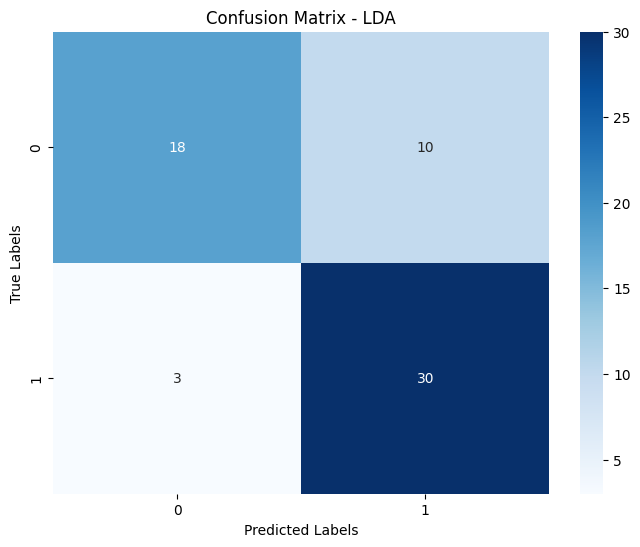

In [29]:
plot_confusion_matrix(y_test_lda, y_pred_lda, model_name_lda)

### Evaluasi Model SVM

In [30]:
# SVM
y_test_svm, y_pred_svm, model_name_svm = train_svm(X_train, y_train, X_test, y_test)
print_classification_report(y_test_svm, y_pred_svm, model_name_svm)

SVM Model
Classification Report - SVM:

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61



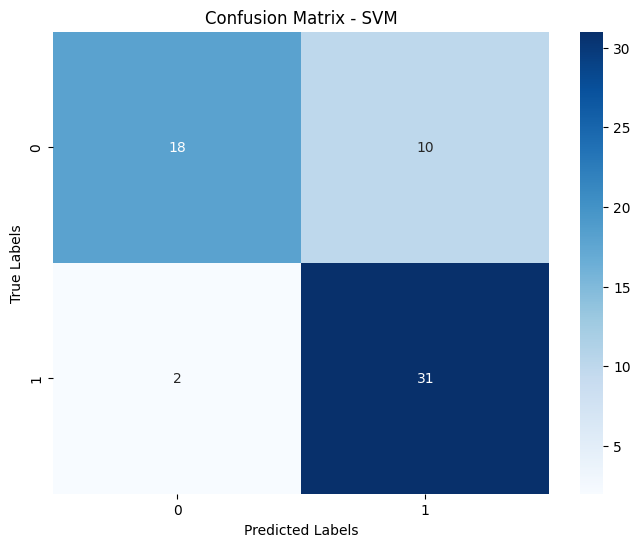

In [31]:
plot_confusion_matrix(y_test_svm, y_pred_svm, model_name_svm)

### Evaluasi Model GB

In [32]:
# Gradient Boosting
y_test_gb, y_pred_gb, model_name_gb = train_gradient_boosting(X_train, y_train, X_test, y_test)
print_classification_report(y_test_gb, y_pred_gb, model_name_gb)

Gradient Boosting Model
Classification Report - Gradient Boosting:

              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



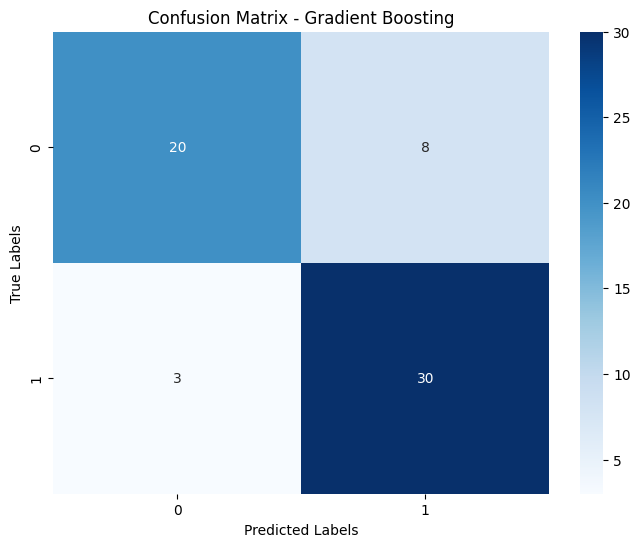

In [33]:
plot_confusion_matrix(y_test_gb, y_pred_gb, model_name_gb)

In [35]:
from joblib import dump

# Simpan model Gradient Boosting
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gb.fit(X_train, y_train)
dump(model_gb, 'model_gradient_boosting.joblib')

['model_gradient_boosting.joblib']

In [36]:
# Simpan model SVM
model_svm = SVC(kernel='linear', C=1.0, random_state=42)
model_svm.fit(X_train, y_train)
dump(model_svm, 'model_svm.joblib')

['model_svm.joblib']

In [37]:
# Simpan model LDA
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)
dump(model_lda, 'model_lda.joblib')

['model_lda.joblib']